# Credit Card Approval Prediction

Kredit bagi masyarakat bukanlah masalah yang asing, Kredit merupakan salah satu pembiayaan sebagian besar dari kegiatan ekonomi dan sumber dana yang penting untuk setiap jenis usaha. Sebelum dimulainya pemberian kredit kepada nasabah diperlukan suatumengidentifikasi dan memprediksi
 
yang baik 
 
dan seksesama terhadap semua aspek  perkreditan yang dapat menunjang proses pemberian kredit, guna mencegah timbulnyamasalah resiko kredit.Setiap tahunnya industri perbankan mengalami peningkatan nasabah untuk kredit.Maka dari itu dalam menghadapi masalah resiko kredit yang dialami oleh Industri perbankansaat ini salah satunya dapat diatasi dengan mengidentifikasi dan memprediksi nasabahdengan baik sebelum memberikan pinjaman dengan cara memperhatikan data historis pinjaman. Oleh karena itu klasifikasi resiko kredit dalam perbankan memiliki peran yang penting. Apabila pengklasifikasian resiko kredit mengalami kesalahan, maka salah satudampak yang ditimbulkan adalah kredit macet. Kredit macet dapat menyebabkankebangkrutan pada bank

## Import Package yang Dibutuhkan

In [92]:
!pip install imblearn

  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)


In [93]:
import numpy as np
import pandas as pd
from scipy import stats
from zipfile import ZipFile
import seaborn as sns
# !pip install imbalanced_learn
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report, accuracy_score

## Load Dataset
Informasi Dataset:


| Jenis | Keterangan | 
| ----------- | :---------: | 
| Sumber | https://www.kaggle.com/rikdifos/credit-card-approval-prediction | 
| Kategori | Layak (0) dan Tidak Layak(1)| 

In [13]:
zip_dir = "../Data/archive.zip"
zip_ref = ZipFile(zip_dir, 'r')
zip_ref
zip_ref.extractall()
zip_ref.close()

In [14]:
app_df = pd.read_csv('../Data/application_record.csv')
credit_df = pd.read_csv('../Data/credit_record.csv')

In [15]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## EDA ( Exploratory Data Analysis )

### Data Understanding

In [16]:
# Memuat informasi dari dataset
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [17]:
# Melihat Statistik dataset
app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [18]:
# melihat jumlah nilai null pada dataset
app_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [19]:
# Mengecek colom apa saja yang tidak mengandung nilai numerik
cat_columns = app_df.columns[(app_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [20]:
# Mengecek kolom apa saya yang mengandung nilai numerik
app_df.columns[(app_df.dtypes !='object').values].tolist()

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [21]:
# mengecek nilai unik pada kolom non numerik

for i in app_df.columns[(app_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(app_df[i].value_counts())
    print('-----------------------------------------------')

CODE_GENDER 

F    294440
M    144117
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
NAME_FAMILY_STATUS 

Married                 299828
Single / not ma

In [22]:
# mengecek nilai unik pada kolom numerik
app_df['CNT_CHILDREN'].value_counts()

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [23]:
# Melihat nilai max dan min pada kolom "Days_Birth"
print('Min DAYS_BIRTH :', app_df['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', app_df['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25201 
Max DAYS_BIRTH : -7489


In [24]:
# Mengubah nilai kolom "Days_Birth" dari hari ke tahun
app_df['DAYS_BIRTH'] = round(app_df['DAYS_BIRTH']/-365,0)
app_df.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [25]:
# mengecek nilai unik pada kolom "Days_Employed" yang lebih besar dari 0
app_df[app_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [26]:
# Seperti disebutkan dalam dokumen, jika 'DAYS_EMPLOYED' positif tidak, berarti orang tersebut sedang menganggur, maka diganti dengan 0
app_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [27]:
# Mengonversi nilai 'DAYS_EMPLOYED' dari Hari ke Tahun
app_df['DAYS_EMPLOYED'] = abs(round(app_df['DAYS_EMPLOYED']/-365,0))
app_df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)  

In [28]:
# Mengecek terdapat nilai apa saja pada kolom "Flag_Mobil"
app_df['FLAG_MOBIL'].value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

In [29]:
# Mengecek terdapat nilai apa saja pada kolom "FLAG_WORK_PHONE"
app_df['FLAG_WORK_PHONE'].value_counts()

0    348156
1     90401
Name: FLAG_WORK_PHONE, dtype: int64

In [30]:
# Mengecek terdapat nilai apa saja pada kolom "FLAG_PHONE"
app_df['FLAG_PHONE'].value_counts()

0    312353
1    126204
Name: FLAG_PHONE, dtype: int64

In [31]:
# Mengecek terdapat nilai apa saja pada kolom "FLAG_EMAIL"
app_df['FLAG_EMAIL'].value_counts()

0    391102
1     47455
Name: FLAG_EMAIL, dtype: int64

In [32]:
# Mengecek terdapat nilai apa saja pada kolom "CNT_FAM_MEMBERS"
app_df['CNT_FAM_MEMBERS'].value_counts()

2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [33]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0


### Data Cleaning

#### Menangani Missing Value
Kolom yang akan kita hapus adalah :
- occupation type : kolom ini dihapus karena banyak sekari terdapat missing value, jadi bisa dibilang kolom ini tidak memiliki peran penting terhadap prediksi yang akan dilakukan
- Flag_mobil : Kolom ini dihapus karena hanya terdapat satu nilai saja
- Flag_work_phone : Kolom ini hanya berisi nilai 0 & 1 untuk Seluler yang tidak dikirimkan, oleh karena itu hapus kolom dan tidak memiliki relasi terhadap kasus, karena hanya hanya menyatakan punya nomer telpon ds
- flag_phone : Kolom ini hanya berisi nilai 0 & 1 untuk Seluler yang tidak dikirimkan, oleh karena itu hapus kolom
- flag_email : Kolom ini hanya berisi nilai 0 & 1 untuk email yang tidak dikirimkan, oleh karena itu hapus kolom

In [34]:
app_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [35]:
app_df.drop('FLAG_MOBIL', axis=1, inplace=True)

In [36]:
app_df.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

In [37]:
app_df.drop('FLAG_PHONE', axis=1, inplace=True)

In [38]:
app_df.drop('FLAG_EMAIL', axis=1, inplace=True)

#### Menangani Outliers
Outliers hanya terjadi pada data numerikal saja

In [39]:
# Mengecek kolom yang berisi nilai numerik
app_df.columns[(app_df.dtypes !='object').values].tolist()

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'CNT_FAM_MEMBERS']

In [40]:
num_cols = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'CNT_FAM_MEMBERS']

plt.figure(figsize=(19,9))
app_df[num_cols].boxplot()
plt.title("Numerical variables in the data", fontsize=20)
plt.show()

NameError: name 'plt' is not defined

In [41]:
# Fungsi Untuk Mendeteksi Outliers
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [42]:
AMT_outliers = detect_outlier(app_df['AMT_INCOME_TOTAL'])
CNTCh_outliers = detect_outlier(app_df['CNT_CHILDREN'])
YE_outliers = detect_outlier(app_df['YEARS_EMPLOYED'])
CFM_outliers = detect_outlier(app_df['CNT_FAM_MEMBERS'])
print("outliers")
print(f"AMT_INCOME_TOTAL : {len(AMT_outliers)}")
print(f"CNT_CHILDREN: {len(CNTCh_outliers)}")
print(f"YEARS_EMPLOYED : {len(YE_outliers)}")
print(f"CNT_FAM_MEMBERS : {len(CFM_outliers)}")

outliers
AMT_INCOME_TOTAL : 5276
CNT_CHILDREN: 6075
YEARS_EMPLOYED : 9531
CNT_FAM_MEMBERS : 5690


In [43]:
# Fungsi untuk menghapus outliers
def remove_outlier(data):
    z = np.abs(stats.zscore(data))
    threshold = 3
    Q1 = np.percentile(data, 25,
                   interpolation = 'midpoint')
    Q3 = np.percentile(data, 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = data >= (Q3+1.5*IQR)
     # Below Lower bound
    lower = data <= (Q1-1.5*IQR)
    return data.index[upper]

In [44]:
application_df = app_df.copy()
application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


In [45]:
application_df.drop(remove_outlier(application_df["CNT_CHILDREN"]), inplace=True)
application_df.drop(remove_outlier(application_df["AMT_INCOME_TOTAL"]), inplace=True)
application_df.drop(remove_outlier(application_df["YEARS_EMPLOYED"]), inplace=True)
application_df.drop(remove_outlier(application_df["CNT_FAM_MEMBERS"]), inplace=True)

In [46]:
application_df["AMT_INCOME_TOTAL"].value_counts()

135000.0    43525
157500.0    36871
180000.0    35367
112500.0    34372
225000.0    31726
            ...  
191475.0        1
90288.0         1
283185.0        1
217300.5        1
120784.5        1
Name: AMT_INCOME_TOTAL, Length: 725, dtype: int64

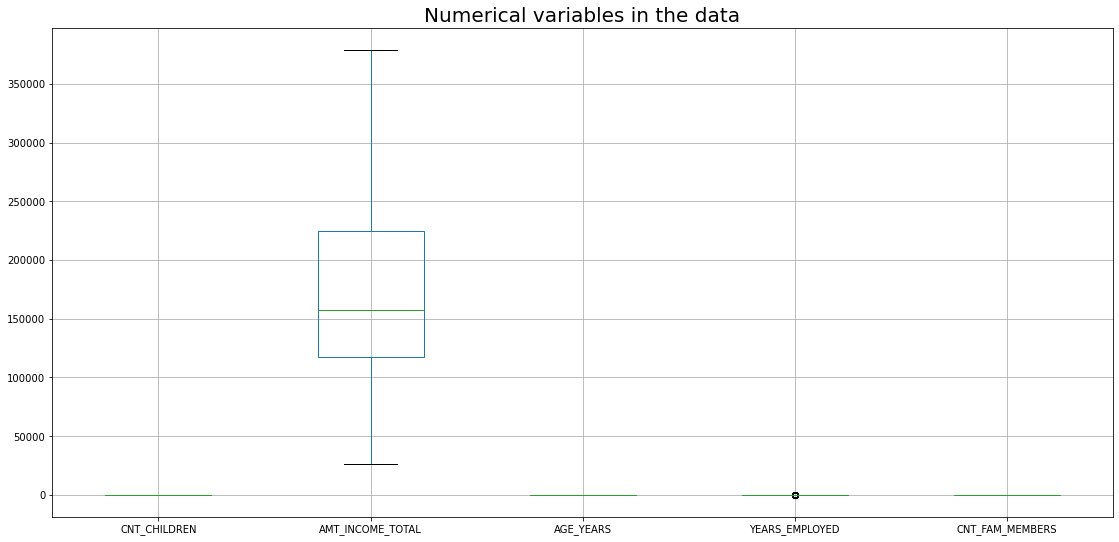

In [94]:
num_cols = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'CNT_FAM_MEMBERS']

plt.figure(figsize=(19,9))
application_df[num_cols].boxplot()
plt.title("Numerical variables in the data", fontsize=20)
plt.show()

In [95]:
application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


In [96]:
AMT_outliers = detect_outlier(application_df['AMT_INCOME_TOTAL'])
CNTCh_outliers = detect_outlier(application_df['CNT_CHILDREN'])
YE_outliers = detect_outlier(application_df['YEARS_EMPLOYED'])
CFM_outliers = detect_outlier(application_df['CNT_FAM_MEMBERS'])
print("outliers")
print(f"AMT_INCOME_TOTAL : {len(AMT_outliers)}")
print(f"CNT_CHILDREN: {len(CNTCh_outliers)}")
print(f"YEARS_EMPLOYED : {len(YE_outliers)}")
print(f"CNT_FAM_MEMBERS : {len(CFM_outliers)}")

outliers
AMT_INCOME_TOTAL : 0
CNT_CHILDREN: 0
YEARS_EMPLOYED : 0
CNT_FAM_MEMBERS : 0


In [97]:
application_df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
dtype: int64

#### Data Transforming

Transforming Data credit_record.csv

In [98]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [99]:
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [100]:
# Mengkategorikan kolom 'STATUS' ke klasifikasi biner 0 : Klien Baik dan 1 : klien buruk
credit_df['STATUS'].replace(['C', 'X'],0, inplace=True)
credit_df['STATUS'].replace(['2','3','4','5'],1, inplace=True)
credit_df['STATUS'] = credit_df['STATUS'].astype('int')

In [101]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 20.0 MB


In [102]:
credit_df['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [103]:
credit_df_trans = credit_df.groupby('ID').agg(max).reset_index()

In [104]:
credit_df_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit_df_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [105]:
credit_df_trans['STATUS'].value_counts(normalize=True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

##### Merging Dataframe

In [106]:
# menggabungkan dua set data berdasarkan 'ID'
final_df = pd.merge(application_df, credit_df_trans, on='ID', how='inner')
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0


In [107]:
final_df.shape

(32416, 14)

In [108]:
# menghapus kolom 'ID' karena hanya memiliki nilai unik (tidak diperlukan untuk Model ML)
final_df.drop('ID', axis=1, inplace=True)

In [109]:
# menghapus record yang duplikat
final_df = final_df.drop_duplicates()
final_df.reset_index(drop=True ,inplace=True)

In [110]:
final_df.shape

(9888, 13)

In [111]:
final_df.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [112]:
final_df['STATUS'].value_counts(normalize=True)*100

0    78.701456
1    21.298544
Name: STATUS, dtype: float64

In [113]:
# Mengonversi semua Kolom Non-Numerik ke Numerik
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
    if col != "OCCUPATION_TYPE":
        globals()['LE_{}'.format(col)] = LabelEncoder()
        final_df[col] = globals()['LE_{}'.format(col)].fit_transform(final_df[col])
final_df.head()  

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0,0
1,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
2,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0,0
3,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0,0
4,1,1,1,0,135000.0,0,4,1,1,49.0,3.0,2.0,0


#### Data Visualization

In [114]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0,0
1,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
2,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0,0
3,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0,0
4,1,1,1,0,135000.0,0,4,1,1,49.0,3.0,2.0,0


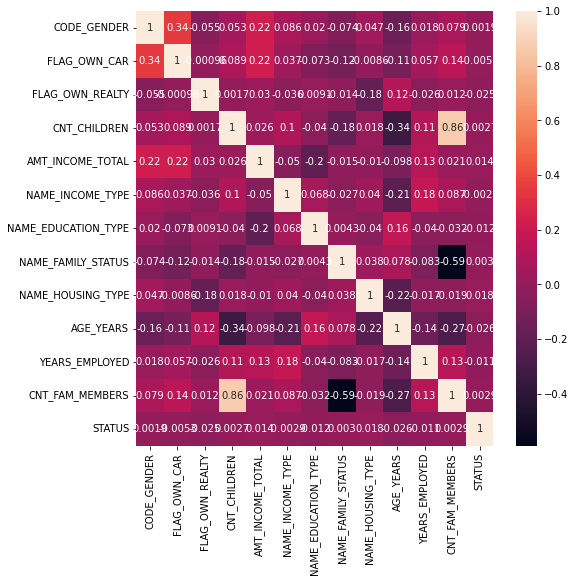

In [115]:
# Grafik ini menunjukkan bahwa, tidak ada kolom (Fitur) yang sangat berkorelasi dengan 'Status'
plt.figure(figsize = (8,8))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

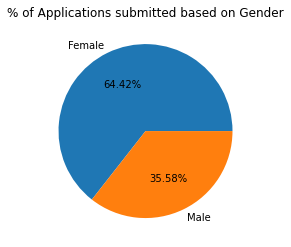

In [116]:
# Grafik ini menunjukkan bahwa, sebagian besar aplikasi diajukan oleh Female's
plt.pie(final_df['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

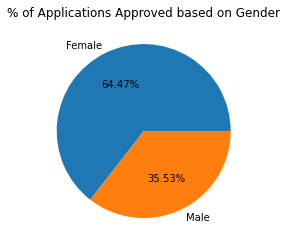

In [117]:
# Grafik ini menunjukkan bahwa, sebagian besar aplikasi disetujui untuk Wanita
plt.pie(final_df[final_df['STATUS']==0]['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

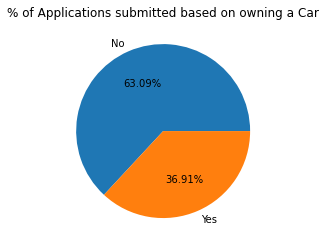

In [118]:
# Grafik ini menunjukkan bahwa, mayoritas pemohon tidak memiliki mobil
plt.pie(final_df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

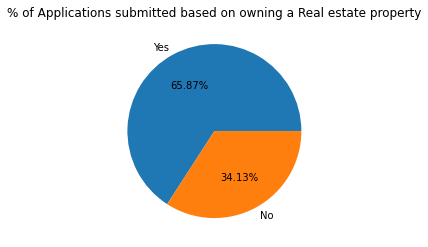

In [119]:
# Grafik ini menunjukkan bahwa, sebagian besar pemohon memiliki properti / Rumah Real Estate
plt.pie(final_df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

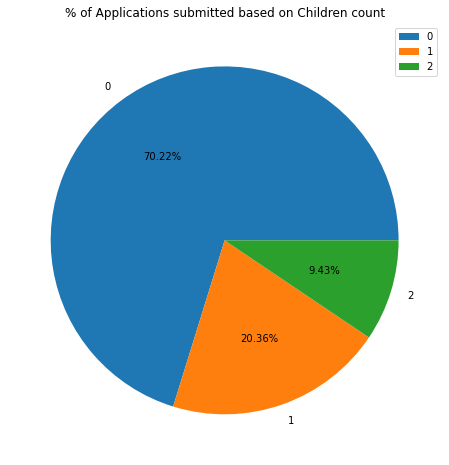

In [120]:
# Grafik ini menunjukkan bahwa, sebagian besar pelamar tidak memiliki anak
plt.figure(figsize = (8,8))
plt.pie(final_df['CNT_CHILDREN'].value_counts(), labels=final_df['CNT_CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

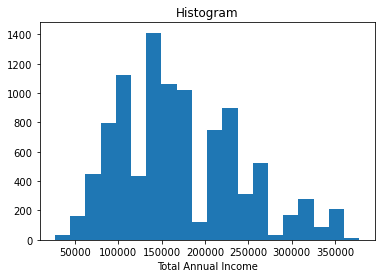

In [121]:
# Grafik ini menunjukkan bahwa, sebagian besar pendapatan pemohon berkisar antara 100k hingga 300k
plt.hist(final_df['AMT_INCOME_TOTAL'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

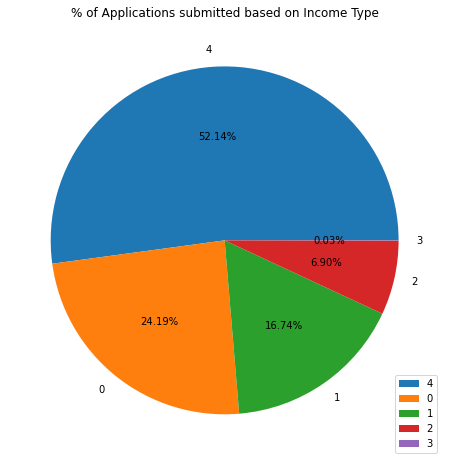

In [122]:
# Grafik ini menunjukkan bahwa, sebagian besar pelamar bekerja secara profesional
plt.figure(figsize = (8,8))
plt.pie(final_df['NAME_INCOME_TYPE'].value_counts(), labels=final_df['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

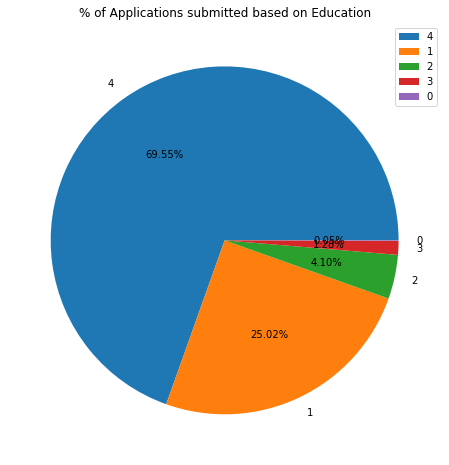

In [123]:
# Grafik ini menunjukkan bahwa, mayoritas pelamar menyelesaikan Pendidikan Menengah
plt.figure(figsize=(8,8))
plt.pie(final_df['NAME_EDUCATION_TYPE'].value_counts(), labels=final_df['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

C:\Users\faisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


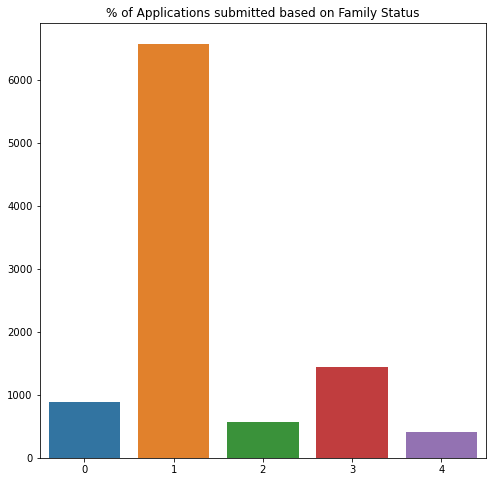

In [124]:
# Grafik ini menunjukkan bahwa sebagian besar pelamar sudah menikah
plt.figure(figsize=(8,8))
sns.barplot(final_df['NAME_FAMILY_STATUS'].value_counts().index, final_df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

C:\Users\faisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


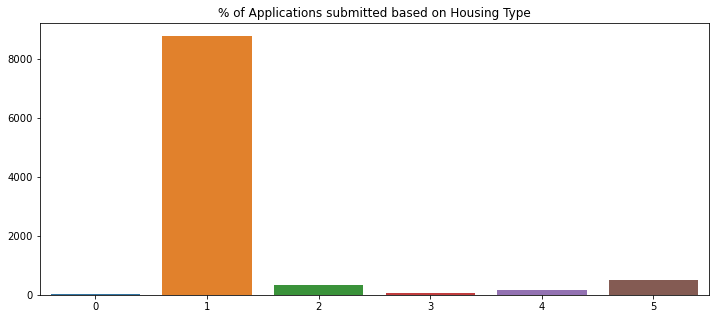

In [125]:
# Grafik ini menunjukkan bahwa, sebagian besar pemohon tinggal di Rumah/Apartemen
plt.figure(figsize=(12,5))
sns.barplot(final_df['NAME_HOUSING_TYPE'].value_counts().index, final_df['NAME_HOUSING_TYPE'].value_counts().values)
plt.title('% of Applications submitted based on Housing Type')
plt.show()

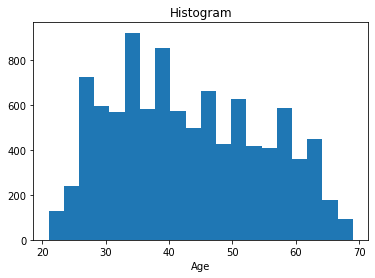

In [126]:
# Grafik ini menunjukkan bahwa, mayoritas pelamar berusia 25 hingga 65 tahun
plt.hist(final_df['AGE_YEARS'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

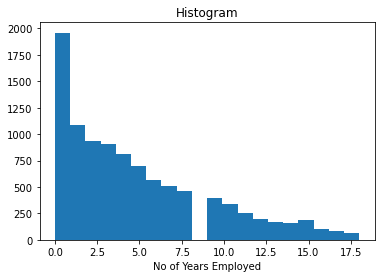

In [127]:
# Grafik ini menunjukkan bahwa, mayoritas pelamar Bekerja selama 0 hingga 7 tahun
plt.hist(final_df['YEARS_EMPLOYED'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

C:\Users\faisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


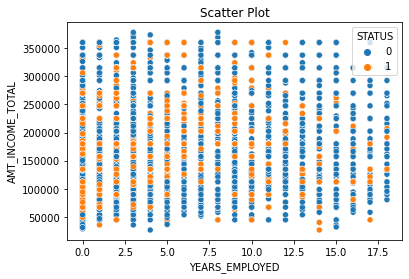

In [128]:
# Grafik ini menunjukkan bahwa, sebagian besar aplikasi ditolak jika Total pendapatan & tahun kerja kurang
sns.scatterplot(final_df['YEARS_EMPLOYED'], final_df['AMT_INCOME_TOTAL'], hue=final_df['STATUS'])
plt.title('Scatter Plot')
plt.show()

### Data Preprocessing

In [129]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0,0
1,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
2,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0,0
3,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0,0
4,1,1,1,0,135000.0,0,4,1,1,49.0,3.0,2.0,0


#### Memisahkan Data menjadi Feature and Label

In [130]:
cat_columns = final_df.columns[(final_df.dtypes =='object').values].tolist()
cat_columns

[]

In [131]:
for col in cat_columns:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

In [132]:
final_df.corr()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
CODE_GENDER,1.000000,0.343799,-0.054899,0.052579,0.221146,0.085995,0.020162,-0.073962,0.047081,-0.155421,0.017756,0.078837,0.001918
FLAG_OWN_CAR,0.343799,1.000000,-0.000960,0.088809,0.217829,0.036883,-0.072902,-0.123162,-0.008566,-0.109582,0.057424,0.143100,-0.005322
FLAG_OWN_REALTY,-0.054899,-0.000960,1.000000,0.001733,0.029619,-0.036173,0.009120,-0.014341,-0.175449,0.122546,-0.025768,0.012292,-0.024576
CNT_CHILDREN,0.052579,0.088809,0.001733,1.000000,0.025695,0.100600,-0.040107,-0.175843,0.018021,-0.335127,0.108390,0.863814,0.002743
AMT_INCOME_TOTAL,0.221146,0.217829,0.029619,0.025695,1.000000,-0.049898,-0.198695,-0.014643,-0.010015,-0.098111,0.128312,0.021118,0.013607
NAME_INCOME_TYPE,0.085995,0.036883,-0.036173,0.100600,-0.049898,1.000000,0.067591,-0.026987,0.039900,-0.214741,0.175201,0.086646,-0.002896
NAME_EDUCATION_TYPE,0.020162,-0.072902,0.009120,-0.040107,-0.198695,0.067591,1.000000,0.004306,-0.040321,0.162203,-0.040172,-0.032149,-0.011945
NAME_FAMILY_STATUS,-0.073962,-0.123162,-0.014341,-0.175843,-0.014643,-0.026987,0.004306,1.000000,0.037724,0.077577,-0.083335,-0.590286,0.002958
NAME_HOUSING_TYPE,0.047081,-0.008566,-0.175449,0.018021,-0.010015,0.039900,-0.040321,0.037724,1.000000,-0.220322,-0.017278,-0.019136,0.018345
AGE_YEARS,-0.155421,-0.109582,0.122546,-0.335127,-0.098111,-0.214741,0.162203,0.077577,-0.220322,1.000000,-0.138212,-0.272286,-0.025796


In [133]:
features = final_df.drop(['STATUS'], axis=1)
label = final_df['STATUS']

In [134]:
features.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0
1,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
2,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0
3,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0
4,1,1,1,0,135000.0,0,4,1,1,49.0,3.0,2.0


In [135]:
label.head()

0    0
1    0
2    0
3    0
4    0
Name: STATUS, dtype: int32

#### Cek Imbalanced Data

In [136]:
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(features, label)

In [137]:
counter = Counter(Y_smote)
print(counter)

Counter({0: 7782, 1: 7782})


#### Normalisasi Data

In [138]:
scaler_minmax =  MinMaxScaler()
# transform data
X_scaled = scaler_minmax.fit_transform(X_smote)
print(X_scaled)

[[1.         1.         1.         ... 0.79166667 0.16666667 0.33333333]
 [0.         0.         1.         ... 0.64583333 0.44444444 0.        ]
 [0.         0.         1.         ... 0.85416667 0.         0.        ]
 ...
 [0.         0.         1.         ... 0.65995554 0.10514567 0.33333333]
 [0.         0.         1.         ... 0.84506117 0.         0.        ]
 [0.         0.         1.         ... 0.26177334 0.36714078 0.66666667]]


#### Split Data to Train and Test

In [139]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y_smote, test_size = 0.2, random_state = 42)

In [140]:
print(X_train.shape)
print(X_test.shape)

(12451, 12)
(3113, 12)


## Modeling
### Logistic Regression

In [141]:
model = LogisticRegression(solver='liblinear', random_state=4)

In [142]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=4, solver='liblinear')

### Evaluating Model

In [143]:
y_pred = model.predict(X_test)

In [144]:
print('Logistic Model Accuracy : ', model.score(X_test, Y_test)*100, '%')

Logistic Model Accuracy :  62.86540314808866 %


In [145]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 957  626]
 [ 530 1000]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      1583
           1       0.62      0.65      0.63      1530

    accuracy                           0.63      3113
   macro avg       0.63      0.63      0.63      3113
weighted avg       0.63      0.63      0.63      3113



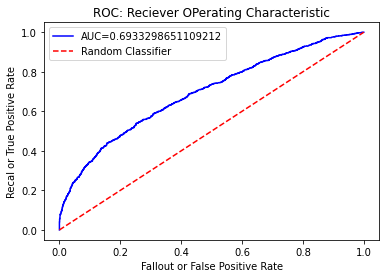

In [146]:
prob_estimates = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, prob_estimates[:,1])
nilai_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Reciever OPerating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recal or True Positive Rate')
plt.legend()
plt.show()

### Tunning Hyperparameter

In [147]:
#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)

In [148]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)

In [149]:
#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 10-Fold CV
clf = GridSearchCV(model, hyperparameters, cv=10)

In [150]:
#Fitting Model
best_model = clf.fit(X_train, Y_train)

In [151]:
#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.23357214690901212


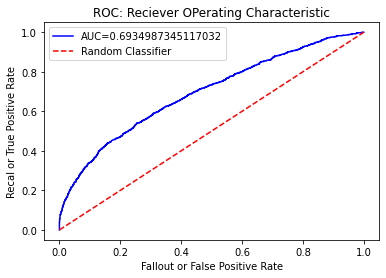

In [152]:
prob_estimates = best_model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, prob_estimates[:,1])
nilai_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Reciever OPerating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recal or True Positive Rate')
plt.legend()
plt.show()

### SVM

In [153]:
svm_model = svm.SVC(kernel='linear')

In [154]:
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [155]:
y_pred_svm = svm_model.predict(X_test)

In [156]:
print('SVM Model Accuracy : ', svm_model.score(X_test, Y_test)*100, '%')

SVM Model Accuracy :  63.82910375843238 %


In [157]:
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1583
           1       0.63      0.65      0.64      1530

    accuracy                           0.64      3113
   macro avg       0.64      0.64      0.64      3113
weighted avg       0.64      0.64      0.64      3113



#### Tunning Hyperparameter

In [158]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [159]:
grid = GridSearchCV(svm_model, param_grid, refit = True, verbose = 3)

In [160]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=  48.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.647 total time=  48.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=  49.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=  49.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=  52.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.642 total time=  48.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=  51.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=  49.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.634 total time=  53.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.630 total time=  42.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.623 total time=  44.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.671 total time=  40.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.666 total time=  46.8s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.661 total time=  37.3s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.675 total time=  35.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.682 total time=  17.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.694 total time=  16.3s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.700 total time=  15.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.697 total time=  15.8s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.689 total time=  20.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.672 total time=   8.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.674 total time=   8.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.681 total time=   8.8s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [161]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [162]:
print(grid.best_estimator_)

SVC(C=1000, gamma=0.1)


In [163]:
grid_predictions = grid.predict(X_test)

In [166]:
print('SVM Model Accuracy : ', grid.score(X_test, Y_test)*100, '%')

SVM Model Accuracy :  69.22582717635721 %


In [225]:
print(metrics.f1_score(Y_test, grid_predictions))

0.6558908045977012


In [228]:
print(metrics.recall_score(Y_test, grid_predictions))

0.5967320261437908


In [229]:
print(metrics.precision_score(Y_test, grid_predictions))

0.7280701754385965


In [167]:
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1583
           1       0.73      0.60      0.66      1530

    accuracy                           0.69      3113
   macro avg       0.70      0.69      0.69      3113
weighted avg       0.70      0.69      0.69      3113



In [197]:
svm_best_model = svm.SVC(kernel='rbf', gamma=0.1, C=1000, probability=True)

In [198]:
svm_best_model.fit(X_train, Y_train)

SVC(C=1000, gamma=0.1, probability=True)

In [213]:
y_pred_svm = svm_best_model.predict(X_test)

In [214]:
accuracy_score(Y_test, y_pred_svm)

0.6922582717635721

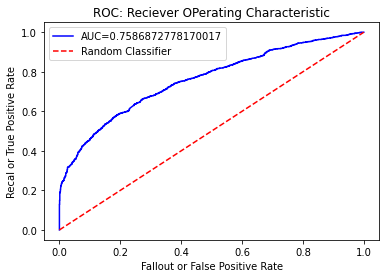

In [215]:
prob_estimates = svm_best_model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, prob_estimates[:,1])
nilai_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Reciever OPerating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recal or True Positive Rate')
plt.legend()
plt.show()

#### Referensi
- Ginting(2019). DATA MINING UNTUK ANALISA PENGAJUAN KREDIT DENGAN MENGGUNAKAN METODE LOGISTIK REGRESI. Jurnal Algoritma, Logika dan Komputasi, 164 - 169.
- N Iriadi, H Leidiyana ( 2013 ).PREDIKSI PINJAMAN KREDIT DENGAN SUPPORT VECTOR MACHINE DAN K-NEAREST NEIGHBORS PADA KOPERASI SERBA USAHA


In [169]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
clf=RandomForestClassifier(n_estimators=200)

In [236]:
print(clf)

RandomForestClassifier(n_estimators=200)


In [193]:
clf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [216]:
y_pred_rf=clf.predict(X_test)

In [218]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_rf))

Accuracy: 0.7173144876325088


In [230]:
print(metrics.f1_score(Y_test, y_pred_rf))

0.7060788243152972


In [231]:
print(metrics.recall_score(Y_test, y_pred_rf))

0.6908496732026144


In [232]:
print(metrics.precision_score(Y_test, y_pred_rf))

0.7219945355191257


In [219]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1583
           1       0.72      0.69      0.71      1530

    accuracy                           0.72      3113
   macro avg       0.72      0.72      0.72      3113
weighted avg       0.72      0.72      0.72      3113



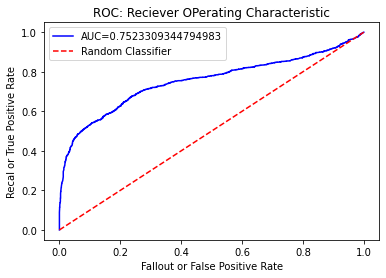

In [204]:
prob_estimates = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, prob_estimates[:,1])
nilai_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Reciever OPerating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recal or True Positive Rate')
plt.legend()
plt.show()

In [205]:
from xgboost import XGBClassifier

In [206]:
model = XGBClassifier()

In [207]:
model.fit(X_train, Y_train)

C:\Users\faisa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [208]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [220]:
y_pred_xgb = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [221]:
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.69%


In [233]:
print(metrics.f1_score(Y_test, y_pred_xgb))

0.800886590321389


In [234]:
print(metrics.recall_score(Y_test, y_pred_xgb))

0.7084967320261438


In [235]:
print(metrics.precision_score(Y_test, y_pred_xgb))

0.9209855564995751


In [222]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1583
           1       0.92      0.71      0.80      1530

    accuracy                           0.83      3113
   macro avg       0.85      0.82      0.82      3113
weighted avg       0.84      0.83      0.82      3113



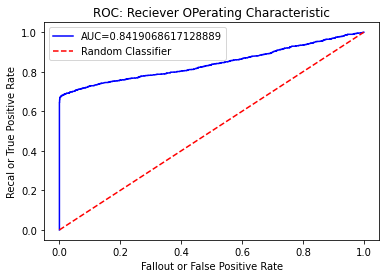

In [223]:
prob_estimates = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, prob_estimates[:,1])
nilai_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Reciever OPerating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recal or True Positive Rate')
plt.legend()
plt.show()